# DVA263 project

# Libraries

Declaring all libraries in use

In [57]:
from matplotlib import pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import L2
import os
import cnn as cnn
import preprocessing as pre
import visualization as vis
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns



# Load Dataset

In [58]:
def load_cnn():
    """Load the datasets for the CNN input"""
    CNN_train = "../dataset/CNN_Input/train/"
    CNN_test = "../dataset/CNN_Input/test/"
    CNN_train = pre.import_images(CNN_train, (150,150),batch_size=16, dataset=True)
    CNN_test = pre.import_images(CNN_test, (150,150), batch_size=16,  dataset=True)
    return CNN_train, CNN_test

# Prepare Data

In [59]:
def prep_cnn(cnn_train, cnn_test):
    """Add noise images to train and test set and normalize"""
    g_noisy_train_data = cnn_train.map(pre.add_gaussian_noise)
    snp_noisy_train_data = cnn_train.map(pre.add_salt_and_pepper_noise)
    combined_train_data = cnn_train.concatenate(g_noisy_train_data).concatenate(snp_noisy_train_data)

    percentage_noisy_images = 0.2
    total_test_images = len(CNN_test) * 16  # Total images in test data
    num_noisy_images = int(total_test_images * percentage_noisy_images)

    g_noisy_test_data = cnn_test.take(num_noisy_images).map(pre.add_gaussian_noise)
    snp_noisy_test_data = cnn_test.take(num_noisy_images).map(pre.add_salt_and_pepper_noise)
    remaining_test_data = cnn_test.skip(num_noisy_images)

    combined_test_data = g_noisy_test_data.concatenate(remaining_test_data)
    combined_test_data = combined_test_data.concatenate(snp_noisy_test_data)

    test_data_norm, train_data_norm = pre.normalize_dataset(combined_train_data, combined_test_data)
    return train_data_norm, test_data_norm


# Build and Compile Model

In [60]:
def build_cnn():
    model = cnn.build_cnn_model()
    return model

#  Train Model

In [61]:
def train_cnn(model,cnn_train, cnn_test):
    history = cnn.train_model(model, cnn_train, cnn_test)
    return history

# Putting everything together

Main section putting each part together and running the classification task

In [62]:
CNN_train, CNN_test = load_cnn()
CNN_train, CNN_test = prep_cnn(CNN_train, CNN_test)
CNN_model = build_cnn()
CNN_history = train_cnn(CNN_model, CNN_train, CNN_test)


CNN_model.predict(CNN_test) # here we will use the output from the autoencoder.


Found 83 files belonging to 4 classes.
Found 62 files belonging to 4 classes.
Epoch 1/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.2832 - loss: 1.4183 - val_accuracy: 0.2581 - val_loss: 1.3848 - learning_rate: 0.0010
Epoch 2/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 85ms/step - accuracy: 0.2559 - loss: 1.3855 - val_accuracy: 0.2581 - val_loss: 1.3831 - learning_rate: 0.0010
Epoch 3/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.2843 - loss: 1.3822 - val_accuracy: 0.3387 - val_loss: 1.3809 - learning_rate: 0.0010
Epoch 4/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.2773 - loss: 1.3799 - val_accuracy: 0.2823 - val_loss: 1.3742 - learning_rate: 0.0010
Epoch 5/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step - accuracy: 0.3374 - loss: 1.3712 - val_accuracy: 0.4919 - val_loss: 1.3585 - learning_rate: 0.0010
Epoch 6/70
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.6149 - loss: 1.3424 - val_accuracy: 0.3710 - val_loss: 1.2794 - learning_rate: 0.0010
Epoch 7/70
18/18

array([[2.05326884e-08, 1.50584665e-08, 9.99031901e-01, 9.68127279e-04],
       [2.32000093e-04, 9.94037986e-01, 4.27774438e-08, 5.72998775e-03],
       [5.00229858e-10, 3.46873712e-08, 9.99467313e-01, 5.32609818e-04],
       [1.92084012e-03, 9.98079062e-01, 1.01678800e-12, 1.31664819e-07],
       [2.10615610e-07, 1.20625003e-07, 9.98672247e-01, 1.32744096e-03],
       [9.99989033e-01, 9.68381210e-06, 1.30873684e-06, 3.05455550e-09],
       [3.31661926e-04, 4.49999759e-04, 1.56762339e-02, 9.83542085e-01],
       [1.57543648e-11, 2.72530505e-11, 9.99988079e-01, 1.18990647e-05],
       [9.98984277e-01, 1.00963470e-03, 4.87366560e-06, 1.16031595e-06],
       [4.99558701e-06, 9.99371946e-01, 1.73947801e-10, 6.23129541e-04],
       [9.09465214e-08, 2.72198795e-05, 3.85487196e-03, 9.96117830e-01],
       [8.48045165e-04, 9.98950481e-01, 4.21734148e-06, 1.97171059e-04],
       [3.53937139e-05, 9.99945998e-01, 2.02063741e-10, 1.85784957e-05],
       [2.56907719e-04, 9.98615861e-01, 1.39553533e

In [77]:
# Now let's extract the images and labels from CNN_test
all_images = []
all_labels = []

# Iterate through the dataset to collect the images and labels
for images, labels in CNN_test:
    all_images.append(images.numpy())  # Convert the batch of images to NumPy arrays
    all_labels.append(labels.numpy())  # Convert the batch of labels to NumPy arrays

# Concatenate the lists to form a single array of all images and labels
all_images_np = np.concatenate(all_images, axis=0)
all_labels_np = np.concatenate(all_labels, axis=0)

print("Shape of all images:", all_images_np.shape)
print("Shape of all labels:", all_labels_np.shape)

print(all_labels_np)

Shape of all images: (124, 150, 150, 3)
Shape of all labels: (124, 4)
[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]


In [83]:
print(all_labels_np)

[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0.

In [79]:
y_pred = CNN_model.predict(all_images_np)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [81]:
y_one_hot = np.zeros_like(y_pred)  # Initialize an array of zeros with the same shape
y_one_hot[np.arange(len(y_pred)), np.argmax(y_pred, axis=1)] = 1

print("Original probabilities:")
print(y_pred)
print("\nOne-hot encoded:")
print(y_one_hot)
print(y_one_hot.shape)

Original probabilities:
[[1.56884905e-08 7.96759632e-05 9.74286886e-05 9.99822915e-01]
 [1.77433854e-03 9.98225510e-01 8.61520761e-13 1.31066727e-07]
 [6.12252916e-04 9.99265850e-01 2.78597634e-09 1.21865181e-04]
 [4.11057845e-04 6.95215538e-04 1.00168725e-02 9.88876879e-01]
 [1.08609529e-05 9.99989033e-01 5.21392565e-08 2.26193997e-09]
 [1.92277857e-05 8.76954218e-05 6.22393284e-03 9.93669212e-01]
 [9.98166943e-05 9.99900222e-01 5.41914680e-20 5.54093067e-13]
 [1.13385357e-03 9.83523190e-01 1.38328198e-06 1.53415436e-02]
 [3.42364120e-03 9.96514738e-01 1.38216762e-08 6.16015677e-05]
 [9.45306550e-13 1.90344563e-11 9.99853253e-01 1.46728431e-04]
 [1.38502955e-05 6.38045836e-04 7.79047608e-04 9.98569012e-01]
 [9.99990463e-01 9.57400061e-06 1.25801344e-12 3.05531433e-11]
 [1.00486332e-07 8.45835257e-06 1.67706830e-03 9.98314381e-01]
 [9.99825060e-01 1.66049038e-04 8.68768529e-06 2.07123378e-07]
 [7.01743738e-06 1.72085137e-07 9.99958754e-01 3.40276201e-05]
 [5.96545287e-05 9.99939561e-01

In [91]:
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(all_labels_np, axis=1)

print(y_pred_classes)
print(y_true_classes)


[3 1 1 3 1 3 1 1 1 2 3 0 3 0 2 1 0 3 0 1 2 3 0 2 0 2 2 0 3 2 0 0 2 2 1 3 2
 3 3 1 2 1 0 1 2 2 1 3 0 1 1 3 1 3 2 1 0 0 3 0 2 2 1 0 1 3 3 0 1 3 1 2 1 2
 0 2 2 1 3 3 0 0 3 0 1 0 2 2 3 2 0 2 3 0 3 1 2 3 1 3 2 2 3 2 2 3 2 1 0 2 2
 0 0 1 3 0 1 2 1 1 3 1 0 1]
[3 1 1 3 1 3 1 1 1 2 3 0 3 0 2 1 0 3 0 1 2 3 0 2 0 2 2 0 3 2 0 0 2 2 1 3 2
 3 3 1 2 1 0 1 2 2 1 3 0 1 1 3 1 3 2 1 0 0 3 0 2 2 1 0 1 3 1 0 1 3 1 2 1 2
 0 2 2 1 3 3 0 0 3 0 1 0 2 2 3 2 0 3 3 0 3 1 2 3 1 3 2 2 3 2 2 3 2 1 0 2 2
 0 0 1 3 0 1 2 1 1 3 1 0 1]


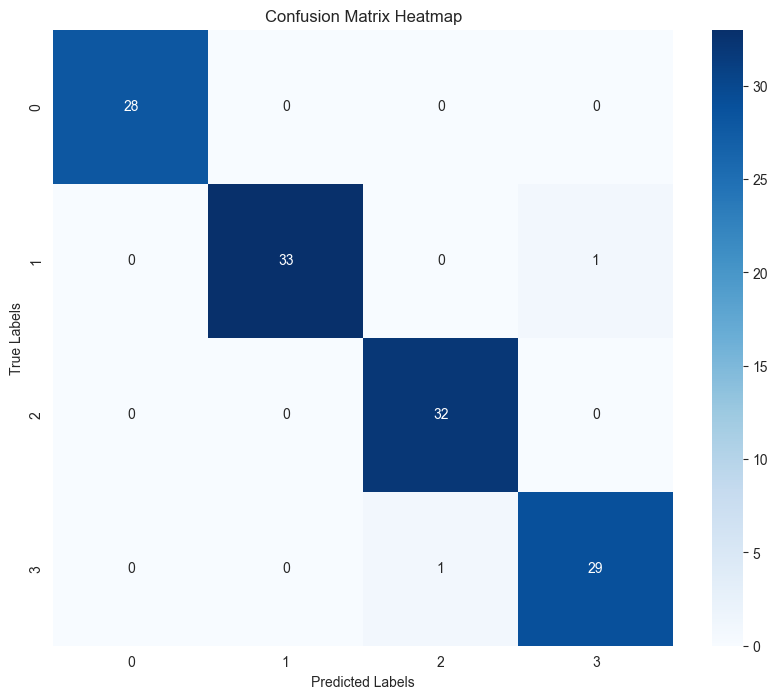

In [92]:
from sklearn.metrics import confusion_matrix
# Convert the predicted probabilities to class indices (if needed)
# Create the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)

# Add labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix Heatmap")
plt.show()